In [1]:
#Importing All major The Necessary Packages
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
from sklearn.decomposition import PCA
import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler 

In [2]:
xls_file=pd.read_csv('C:/Users/Amardeep/Desktop/PLASTICS DATASETS/train_processed.csv')

In [3]:
DT_columns=xls_file

In [4]:
DT=xls_file

In [5]:
one_hot=pd.get_dummies(DT['section'])
# Drop column as it is now encoded
DT = DT.drop('section',axis = 1)
# Join the encoded df
DT = DT.join(one_hot)

In [5]:
DT_columns=DT.columns

In [11]:
#Scaling the bin and obtaining the scores for the pca analysis.
DT_index=DT.index
DT= StandardScaler().fit_transform(DT)
pca = PCA(n_components=3, svd_solver='full')
PC_scores = pca.fit_transform(DT)
scores_pd = pd.DataFrame(data = PC_scores
                         ,columns = ['PC1', 'PC2', 'PC3']
                         ,index =DT_index)

C:\Users\Amardeep\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Amardeep\Anaconda2\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
DT=pd.DataFrame(DT,columns=)

array([[ 0.4718361 ,  1.08394625,  0.52711062, ..., -0.75553967,
        -0.5807815 ,  2.26318147],
       [-0.99344247, -1.77586793,  1.42616575, ..., -0.75553967,
        -0.5807815 , -0.44185586],
       [-0.63214091, -0.53358382, -0.20637072, ..., -0.75553967,
        -0.5807815 ,  2.26318147],
       ...,
       [-0.31098396, -0.41644389,  0.94759713, ...,  1.32355723,
        -0.5807815 , -0.44185586],
       [ 2.31848854,  0.56959364, -0.15337953, ..., -0.75553967,
        -0.5807815 , -0.44185586],
       [-0.55185167, -0.90062231, -1.38542484, ..., -0.75553967,
         1.72181792, -0.44185586]])

In [22]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3']
                           ,index = DT_columns)

In [23]:
#PLotting the PCA plot fucntion
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T,score_labels):
        plt.text(x, y, label, ha='center', size=11)
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

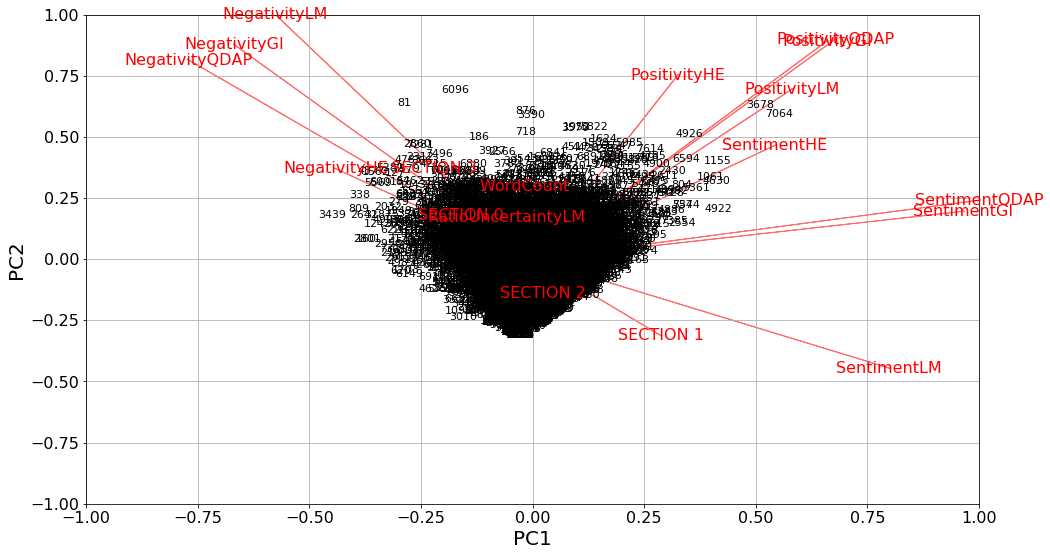

In [24]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(PC_scores[:,:2],loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.show()

In [6]:
X=DT.drop(columns='section')
y=DT['section']

In [29]:
#Standard test using normal condiitons
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)
#Create a Gaussian Classifier
rf1=RandomForestClassifier(n_estimators = 10, max_depth=2, class_weight='balanced')

#Train the model using the training sets y_pred=clf.predict(X_test)
rf1.fit(X_train,y_train)

# prediction on test set
y_pred=rf1.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.46733668341708545)


In [34]:
#Standard test using normal condiitons
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
#Create a Gaussian Classifier
rf1=RandomForestClassifier(n_estimators = 15, max_depth=2,max_leaf_nodes=5)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf1.fit(X_train,y_train)

# prediction on test set
y_pred=rf1.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.4836173001310616)


In [33]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

('Accuracy:', 0.4824331410592554)


ValueError: multiclass format is not supported

In [35]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10,max_leaf_nodes=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [67]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.4562139486103828)


In [46]:
!pip install graphviz

In [47]:
!pip install pydotplus

  Running setup.py bdist_wheel for pydotplus: started
  Running setup.py bdist_wheel for pydotplus: finished with status 'done'
  Stored in directory: C:\Users\Amardeep\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [52]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
clf=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
 max_features=None, max_leaf_nodes=None,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 presort=False, random_state=None, splitter='best')
y_pred = dt.predict(X_test)

In [9]:
#Import svm model
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.5141983398864133)


In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#Import svm model
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\Amardeep\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [7]:
#Import svm model
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculatio
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\Amardeep\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


('Accuracy:', 0.44255133245958933)


In [8]:
#Import svm model
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
#Create a svm Classifier
clf = svm.SVC(kernel='sigmoid') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.3717780690257754)


In [11]:
import math
import random
from collections import defaultdict
from pprint import pprint

In [12]:
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
DT[1:5,1:5]

TypeError: unhashable type

In [38]:
xls_file1=pd.ExcelFile('C:/Users/Amardeep/Desktop/PLASTICS DATASETS/Data_Train.xlsx')
DT1=xls_file1.parse()
st=DT1['STORY']

In [ ]:
st[1]

In [13]:
from sklearn.feature_extraction.text import CountVectorizer


In [46]:
vect = CountVectorizer(max_features=1000, binary=True)
X = vect.fit_transform(st)

X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
from sklearn.model_selection import train_test_split

X = DT1['STORY']
y = DT1.drop(columns='STORY')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, binary=True)

X_train_vect = vect.fit_transform(X_train)

In [53]:
!pip install imblearn.over_sampling

  Could not find a version that satisfies the requirement imblearn.over_sampling (from versions: )
No matching distribution found for imblearn.over_sampling


In [52]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)

ImportError: No module named imblearn.over_sampling

In [54]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train, y_train)

nb.score(X_train, y_train)

ValueError: could not convert string to float: Actor Mahesh Babu is gearing up to entertain the audience with the Vamshi Paidipally directorial Maharshi, which is scheduled for a worldwide release on May 9    As a part of Maharshi promotions, the 

In [45]:
i=0
X_vector=[]

for i in range(len(st)):
    vect = CountVectorizer(binary=True)
    X_vector[i] = vect.fit_transform(st[i])
      


ValueError: Iterable over raw text documents expected, string object received.

In [ ]:
loadings.pd